In [1]:
import sys
print(sys.version)

# add path to .py files so they can be loaded.
module_dir = "../"
sys.path.append(module_dir)

# define the plot dir
MAIN_DIR = '../'
PLOT_DIR = './plots'
RAW_DATA_DIR = '../raw_data/'

3.5.1 |Continuum Analytics, Inc.| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

In [4]:
import abundance_plot_utils

In [5]:
data_reduced = \
        pd.read_csv(MAIN_DIR +
                    "results/reduced_data--all_taxonomy_remains.csv")

In [6]:
METHYLOCOCCACEAE = {'Genus': ['Methylobacter', 'Methylovulum',
                              'Methylomonas', 'Methylosarcina']}

In [7]:
def prepare_df(taxa_dict, main_dir, dataframe):
    plot_data = abundance_plot_utils.aggregate_mixed_taxonomy(
        dataframe=dataframe, taxa_dict=taxa_dict, main_dir=main_dir)
    return plot_data

prepped_data = prepare_df(taxa_dict = METHYLOCOCCACEAE, main_dir=MAIN_DIR, dataframe=data_reduced)

Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'fraction of reads', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'fraction of reads', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'fraction of reads', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')
Index(['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Length',
       'fraction of reads', 'project', 'ID', 'oxy', 'rep', 'week'],
      dtype='object')


In [8]:
prepped_data.head()

,ID,abundance sum,taxonomic level,taxonomic name,oxy,rep,week,project
0,100_LOW12,0.488347,Genus,Methylobacter,Low,4,12,1056214
1,100_LOW12,0.002571,Genus,Methylovulum,Low,4,12,1056214
2,100_LOW12,0.014736,Genus,Methylomonas,Low,4,12,1056214
3,100_LOW12,0.004356,Genus,Methylosarcina,Low,4,12,1056214
4,103_HOW12,0.095143,Genus,Methylobacter,High,1,12,1056217


In [9]:
one_facet = prepped_data[(prepped_data['oxy'] == "Low") & (prepped_data['rep'] == 1)]

In [10]:
one_facet_pivoted = one_facet.pivot(index='week', columns = 'taxonomic name', values = 'abundance sum')
one_facet_pivoted.head()

taxonomic name,Methylobacter,Methylomonas,Methylosarcina,Methylovulum
week,,,,
4,0.205558,0.018689,0.013274,0.008513
5,0.296807,0.011619,0.012291,0.004229
6,0.507823,0.014163,0.009588,0.003858
7,0.461034,0.010989,0.005845,0.003571
8,0.429691,0.009909,0.005363,0.003600


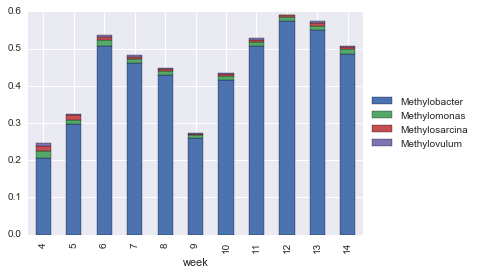

In [11]:
one_facet_pivoted.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

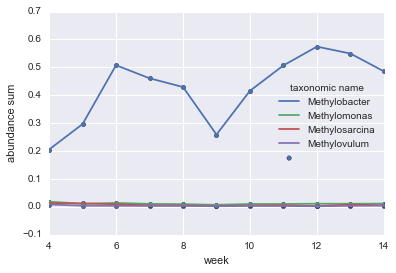

In [13]:
ax = one_facet_pivoted.plot()
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
one_facet.plot(kind='scatter', x='week', y='abundance sum', label='', ax=ax);

In [14]:
one_facet.head()

,ID,abundance sum,taxonomic level,taxonomic name,oxy,rep,week,project
20,109_LOW13,0.549671,Genus,Methylobacter,Low,1,13,1056229
21,109_LOW13,0.003904,Genus,Methylovulum,Low,1,13,1056229
22,109_LOW13,0.011319,Genus,Methylomonas,Low,1,13,1056229
23,109_LOW13,0.008294,Genus,Methylosarcina,Low,1,13,1056229
56,121_LOW14,0.485900,Genus,Methylobacter,Low,1,14,1056253


In [15]:
one_facet.plot.scatter

<bound method FramePlotMethods.scatter of <pandas.tools.plotting.FramePlotMethods object at 0x10e8f0160>>

-c:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


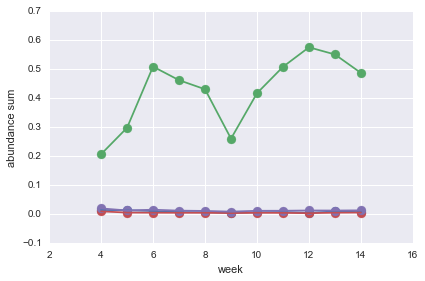

In [16]:
# Use Seaborn FacetGrid without facets:
p = sns.FacetGrid(one_facet.sort('week'), hue = 'taxonomic name', size=4, aspect=1.5) #, hue_kws={"marker": markers})
p.map(plt.scatter, 'week', 'abundance sum', s=80)
p.map(plt.plot, 'week', 'abundance sum')

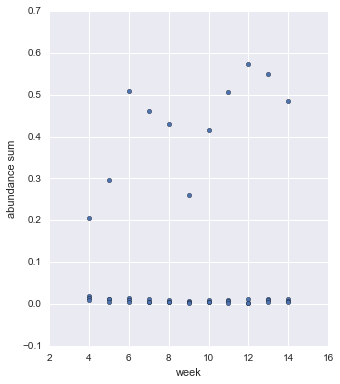

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
for tup, df in one_facet.groupby('taxonomic name'):
    df.plot.scatter(x='week', y='abundance sum', ax=ax)
    

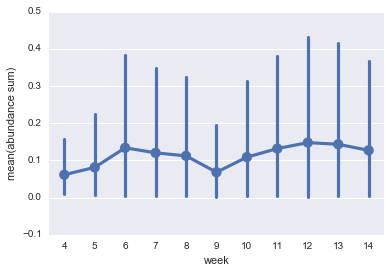

In [18]:
# don't want this: averaging across species. 
sns.pointplot(x="week", y='abundance sum',data=one_facet)

In [ ]:
def facet_bar_plot(data, x, y, **kws): # groupby_col,
        """
        Used to fill the subplots with data.

        :param data: dataframe to plot
        :param groupby: column to group on
        :param xrotation: degrees to rotate x labels by
        :param kws: kewyord arguments for plotting
        :return:
        """
        # pivot only supports one column for now.
        # http://stackoverflow.com/questions/32805267/pandas-pivot-on-multiple-columns-gives-the-truth-value-of-a-dataframe-is-ambigu
        
        # Pass kwargs to heatmap  cmap used to be 'Blue'
        sns.barplot(x=x, y=y, data=data, **kws)
        #g.set_xticklabels(rotation=xrotation)

In [ ]:
facet_bar_plot(data=tips, x='day', y='total_bill')
# groupby_col,

In [ ]:
def plot_heatmap(plot_data, col='week', row='oxy'):
    with sns.plotting_context(font_scale=8):
        g = sns.FacetGrid(plot_data,
                          col=col,
                          row=row,
                          #size=size,
                          #aspect=aspect,
                          margin_titles=True)

    # Add axes for the colorbar.  [left, bottom, width, height]
    cbar_ax = g.fig.add_axes([.92, .3, .02, .4], title='fraction \n of reads')

    g = g.map_dataframe(facet_heatmap,
                        cbar_ax=cbar_ax,
                        # NEED vmax = MAX ABUNDANCE or each plot will have
                        # its own color scale!
                        vmin=0, vmax=max_abundance,
                        annot=annotate,
                        groupby=cols_in_facet,
                        xrotation=xrotation)